In [34]:
%matplotlib inline

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [35]:
# Read the CSV file into a DataFrame
df = pd.read_csv('pgaTourData.csv')

# Fill NaN values with zeros
df = df.fillna(0)

# Filter the DataFrame based on conditions
# Select specific columns
clean_df = df.loc[(df['Year'] == 2018) & (df['Rounds'] >= 1), ['Player Name', 'Year', 'Wins', 'Top 10', 'Money', 'Rounds']]

# Set 'Player Name' as the index
clean_df = clean_df.set_index('Player Name')

# Convert 'Money' column to numeric for each player
clean_df['Money'] = pd.to_numeric(clean_df['Money'].replace('[\$,]', '', regex=True), errors='coerce')

# Create new columns for each player
for player in clean_df.index:
    # Convert 'Money' column to numeric for the specific player
    clean_df.loc[player, 'Money'] = pd.to_numeric(clean_df.loc[player, 'Money'], errors='coerce')

    # Calculate 'Top 10 Ratio'
    clean_df.loc[player, 'Top 10 Ratio'] = clean_df.loc[player, 'Top 10'] / clean_df.loc[player, 'Rounds']

    # Calculate 'Earnings Per Round'
    clean_df.loc[player, 'Earnings Per Round'] = clean_df.loc[player, 'Money'] / clean_df.loc[player, 'Rounds']

clean_df['Earnings Per Round'] = clean_df['Earnings Per Round'].round(2)
# Display the data frame 
clean_df


,Year,Wins,Top 10,Money,Rounds,Top 10 Ratio,Earnings Per Round
Player Name,,,,,,,
Henrik Stenson,2018,0.0,5.0,2680487,60.0,0.083333,44674.78
Ryan Armour,2018,1.0,3.0,2485203,109.0,0.027523,22800.03
Chez Reavie,2018,0.0,3.0,2700018,93.0,0.032258,29032.45
Ryan Moore,2018,0.0,5.0,1986608,78.0,0.064103,25469.33
Brian Stuard,2018,0.0,3.0,1089763,103.0,0.029126,10580.22
Brian Gay,2018,0.0,6.0,2152501,103.0,0.058252,20898.07
Kyle Stanley,2018,0.0,5.0,3916001,93.0,0.053763,42107.54
Emiliano Grillo,2018,0.0,5.0,2493163,94.0,0.053191,26523.01
Russell Henley,2018,0.0,3.0,1516438,77.0,0.038961,19694.00


In [36]:
features = clean_df[['Top 10 Ratio', 'Earnings Per Round', 'Wins']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform KMeans clustering with k=10
kmeans = KMeans(n_clusters=10)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original DataFrame
clean_df['Cluster'] = cluster_labels

clean_df.sort_values(by='Cluster', inplace=True)
# Display the DataFrame with the added 'Cluster' column
clean_df

,Year,Wins,Top 10,Money,Rounds,Top 10 Ratio,Earnings Per Round,Cluster
Player Name,,,,,,,,
Ricky Barnes,2018,0.0,1.0,340591,65.0,0.015385,5239.86,0
Seamus Power,2018,0.0,2.0,791018,86.0,0.023256,9197.88,0
John Huh,2018,0.0,2.0,974538,94.0,0.021277,10367.43,0
Retief Goosen,2018,0.0,1.0,545364,60.0,0.016667,9089.40,0
Matt Every,2018,0.0,1.0,299162,79.0,0.012658,3786.86,0
Denny McCarthy,2018,0.0,1.0,498341,71.0,0.014085,7018.89,0
Ben Silverman,2018,0.0,2.0,793140,90.0,0.022222,8812.67,0
Adam Schenk,2018,0.0,1.0,474923,86.0,0.011628,5522.36,0
Xinjun Zhang,2018,0.0,1.0,420377,81.0,0.012346,5189.84,0


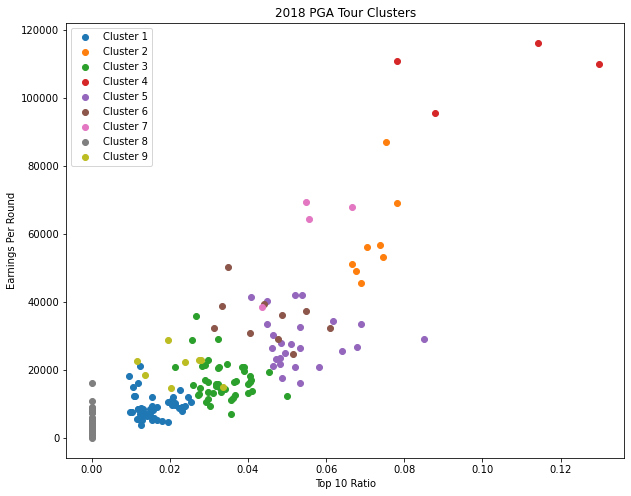

In [37]:
features = clean_df[['Top 10 Ratio', 'Earnings Per Round']]
cluster_labels = clean_df['Cluster']

# Create a scatter plot
plt.figure(figsize=(10, 8))

# Scatter plot points based on the clusters
for cluster in range(0,9):
    cluster_points = features[cluster_labels == cluster]
    plt.scatter(cluster_points['Top 10 Ratio'], cluster_points['Earnings Per Round'], label=f'Cluster {cluster + 1}')

plt.xlabel('Top 10 Ratio')
plt.ylabel('Earnings Per Round')
plt.title('2018 PGA Tour Clusters')
plt.legend()
plt.show()
